### Flip Test

This notebook checks how often a birdsong is categorised as having the longer path in a pair of songs and how often as having the shorter path.


In [1]:
# Import required packages
 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import itertools
import glob


In [2]:
# Assign the folder paths
# The data folder needs to have the "path_length_df.csv" file generated in Test #3.
# The results folder should be empty

data_folder = r"../Data/"
results_folder = r"../Results/"


In [3]:
# Read the data file containing path lengths of 31 tutored bird songs across 20 UMAP renditions

data_file  = data_folder  + 'path_length_df.csv'
distances_df = pd.read_csv(data_file, index_col=0)
distances_df

,bird_id,iteration,rseed,distance,kdistance,n_syll,range_0_min,range_1_min,range_0_max,range_1_max
0,0,0,56755036,49.603840,52.074928,6,-16.302376,17.834356,-16.302376,17.834356
1,1,0,56755036,47.494719,48.703142,5,-16.302376,17.834356,-16.302376,17.834356
2,2,0,56755036,35.715927,35.872187,6,-16.302376,17.834356,-16.302376,17.834356
3,3,0,56755036,13.242254,16.606300,4,-16.302376,17.834356,-16.302376,17.834356
4,4,0,56755036,44.055370,47.606559,4,-16.302376,17.834356,-16.302376,17.834356
...,...,...,...,...,...,...,...,...,...,...
615,26,19,88409749,26.443624,28.635379,3,-16.302376,17.834356,-16.302376,17.834356
616,27,19,88409749,33.342761,29.591575,4,-16.302376,17.834356,-16.302376,17.834356
617,28,19,88409749,29.202572,31.240902,5,-16.302376,17.834356,-16.302376,17.834356
618,29,19,88409749,17.325166,19.958627,4,-16.302376,17.834356,-16.302376,17.834356


In [4]:
# Metadata

n_birds = 31
n_iterations = 20


In [5]:
# Initialise empty matrices and dictionaries to store the results of the flip test

path_length_diff = np.zeros((n_birds, n_birds, n_iterations))
path_length_bysyll_diff = np.zeros((n_birds, n_birds, n_iterations))
path_length_diff_dict = {
    'bird1': [],
    'bird2': [],
    'iteration': [],
    'path_length1': [],
    'path_length2': [],
    'path_length_diff': [],
    'n_syll1': [],
    'n_syll2': [],
    'n_syll_diff': [],
    'path_length_bysyll1': [],
    'path_length_bysyll2': [],
    'path_length_bysyll_diff': []
}

# Initialise auxilliary variables for plotting
xticklabels = []
xvals = []

### Flip Test

This is the main block for the flip test.

From the dataset of 31 tutored birds, we form 930 pairs.
Half of these are redundant, so we are left with 465 pairs.

For each pair of birds i and j, we store the difference in their path lengths (kdistance).
A positive difference implies bird j has the longer path length and vice versa.

The flip test proportions are computed based on this difference. 

Additionally, we store the difference in the syllable counts of the two birds (nsyll_j - nsyll_i).

Finally, we compute the difference in their respective syllable count normalised path lengths, i.e. kdistance_j/nsyll_j - kdistance_i/nsyll_i.

In [6]:
xpos = 0

# Iterating through each pair of birds
for i in tqdm(range(n_birds)):
    for j in range(n_birds):
        # Discarding redundant pairs
        if i < j:
            # Iterating through each UMAP rendition
            for iter in range(n_iterations):
                # Read path length of each bird in the pair from the datafile
                kdisti = distances_df.loc[(distances_df.bird_id == i) & (distances_df.iteration == iter), 'kdistance'].values[0]
                kdistj = distances_df.loc[(distances_df.bird_id == j) & (distances_df.iteration == iter), 'kdistance'].values[0]

                # Read syllable count of each bird in the pair from the datafile
                nsylli = distances_df.loc[(distances_df.bird_id == i), 'n_syll'].values[0]
                nsyllj = distances_df.loc[(distances_df.bird_id == j), 'n_syll'].values[0]

                # Compute difference in path lengths of the two birds
                kdistdiff = kdistj - kdisti
                path_length_diff[i, j, iter] = kdistdiff

                # Compute difference in the normalised path lengths of the two birds
                kdistdiff_bysyll = kdistj/nsyllj - kdisti/nsylli
                path_length_bysyll_diff[i, j, iter] = kdistdiff_bysyll

                # Compute difference in syllable count of the two birds
                n_syll_diff = nsyllj - nsylli
                
                # Store the results in the dictionary
                path_length_diff_dict['bird1'].append(i)
                path_length_diff_dict['bird2'].append(j)
                path_length_diff_dict['iteration'].append(iter)
                path_length_diff_dict['path_length1'].append(kdisti)
                path_length_diff_dict['path_length2'].append(kdistj)
                path_length_diff_dict['path_length_diff'].append(kdistdiff)
                path_length_diff_dict['n_syll1'].append(nsylli)
                path_length_diff_dict['n_syll2'].append(nsyllj)
                path_length_diff_dict['n_syll_diff'].append(n_syll_diff)
                path_length_diff_dict['path_length_bysyll1'].append(kdisti/nsylli)
                path_length_diff_dict['path_length_bysyll2'].append(kdistj/nsyllj)
                path_length_diff_dict['path_length_bysyll_diff'].append(kdistdiff_bysyll)
                
                xvals.append(xpos)
                
            xpos += 1
            xticklabels.append(str(i) + ',' + str(j))

100%|██████████| 31/31 [00:04<00:00,  6.63it/s]


In [7]:
# Convert the dictionary to a pandas DataFrame
path_length_diff_df = pd.DataFrame(path_length_diff_dict)

# Save the DataFrame to a CSV file
path_length_diff_df.to_csv(results_folder + 'path_length_diff.csv', index=False)

path_length_diff_df

,bird1,bird2,iteration,path_length1,path_length2,path_length_diff,n_syll1,n_syll2,n_syll_diff,path_length_bysyll1,path_length_bysyll2,path_length_bysyll_diff
0,0,1,0,52.074928,48.703142,-3.371786,6,5,-1,8.679155,9.740628,1.061474
1,0,1,1,37.754210,35.640703,-2.113507,6,5,-1,6.292368,7.128141,0.835772
2,0,1,2,59.106257,41.904853,-17.201404,6,5,-1,9.851043,8.380971,-1.470072
3,0,1,3,35.396143,43.366839,7.970697,6,5,-1,5.899357,8.673368,2.774011
4,0,1,4,36.718159,34.488247,-2.229912,6,5,-1,6.119693,6.897649,0.777956
...,...,...,...,...,...,...,...,...,...,...,...,...
9295,29,30,15,22.075750,68.149547,46.073797,4,5,1,5.518938,13.629909,8.110972
9296,29,30,16,33.296904,41.762904,8.466000,4,5,1,8.324226,8.352581,0.028355
9297,29,30,17,42.377327,33.161871,-9.215456,4,5,1,10.594332,6.632374,-3.961958
9298,29,30,18,36.371410,41.624739,5.253328,4,5,1,9.092853,8.324948,-0.767905


Now that the difference in path lengths has been computed for each birdsong pair, we have the long/short path categorisations.

We can now look at these categorisations for a given pair across UMAP renditions.


In [8]:
# Setting the plot labels for each pair

nsyll_labels = path_length_diff_df.n_syll_diff.values
ilabels = path_length_diff_df.loc[path_length_diff_df.iteration==0].bird1.values.astype(str)
jlabels = path_length_diff_df.loc[path_length_diff_df.iteration==0].bird2.values.astype(str)
xticklabels = np.char.add(ilabels, ',')
xticklabels = np.char.add(xticklabels, jlabels)
xticks = np.arange(xticklabels.shape[0])

In [9]:
# Collecting the difference in path lengths for each pair of birds across all UMAP renditions

path_length_diff_yvals = path_length_diff_df.path_length_diff.values
path_length_diff_yvals = np.reshape(path_length_diff_yvals, (xticklabels.shape[0], n_iterations))

In [10]:
# Collecting the syllable count normalised difference in path lengths for each pair of birds across all UMAP renditions

path_length_bysyll_diff_yvals = path_length_diff_df.path_length_bysyll_diff.values
path_length_bysyll_diff_yvals = np.reshape(path_length_bysyll_diff_yvals, (xticklabels.shape[0], n_iterations))

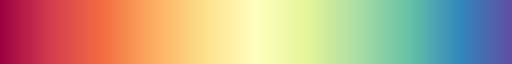

In [11]:
# Setting the colormap

cmap = plt.get_cmap('Spectral')
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
cmap

### Visualising the consistency of categorisation of the path length of a bird song as long/short. 


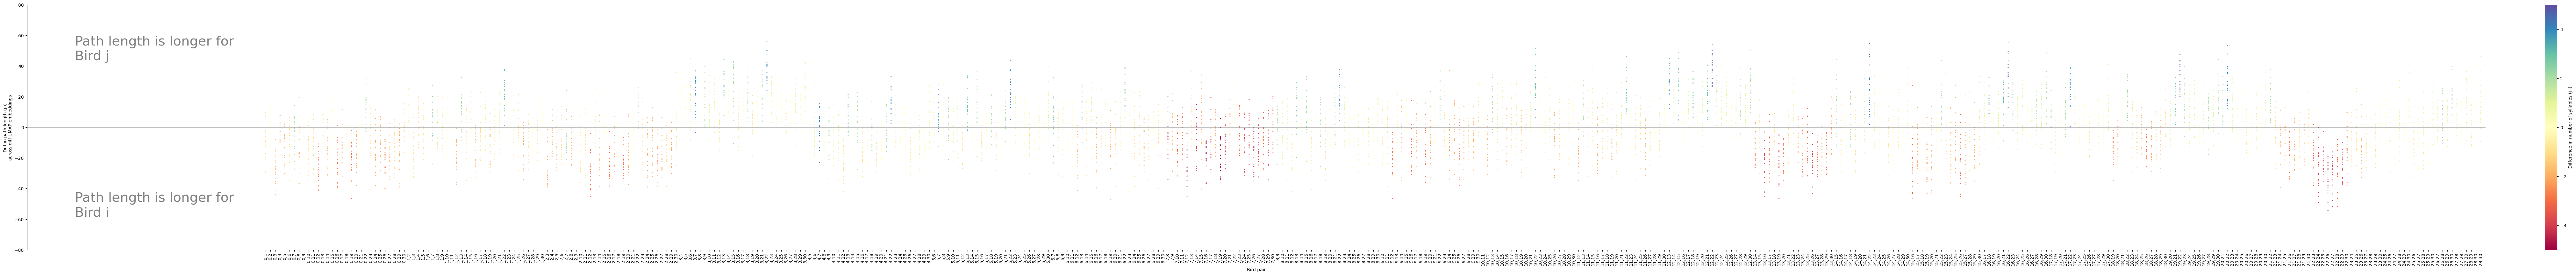

In [12]:
# Plotting the difference in path lengths for each pair of birds across all UMAP renditions

fig, ax = plt.subplots(figsize=(120,10))
cp = ax.scatter(xvals, path_length_diff_yvals, marker='.', s=5, c=nsyll_labels, alpha=1, cmap=cmap)

ax.axhline(y=0, color='grey', alpha=.5, linewidth=1)
ax.text(-40, 60, 'Path length is longer for\nBird j', color='grey', fontsize=30, va='top')
ax.text(-40, -60, 'Path length is longer for\nBird i', color='grey', fontsize=30, va='bottom')

ax.set_ylim(-80, 80)
ax.set_xlim(-50, xvals[-1]+1)

ax.set_xlabel('Bird pair')
ax.set_ylabel('Diff in path length (j-i)\nacross diff UMAP embeddings')

# Add a colorbar
cbar = fig.colorbar(cp, pad=0.02)
cbar.set_label('Difference in number of syllables (j-i)')

ax.set_xticks(xticks);

ax.set_xticklabels(xticklabels, rotation=90);

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)



In [13]:
# Saving the figure

fig.savefig(results_folder + 'path_length_diff.pdf', bbox_inches='tight')
fig.savefig(results_folder + 'path_length_diff.png', bbox_inches='tight')

Here, for each pair of birds, we plot the difference in their path lengths.

If the difference is positive, it implies that bird j has the longer path length and vice versa.


Additionally, the difference in syllable count is depicted by the color of the dots.


We see that for any given pair of birds, the difference in path length can be either positive or negative, depending on the UMAP rendition.

Thus, there isn't a consensus amongst different UMAP renditions in the categorisation of the birdsong with the longer path length.


We see that bird pairs with a higher occurence of path length difference above or below the threshold, also have a more extreme difference in syllable count.

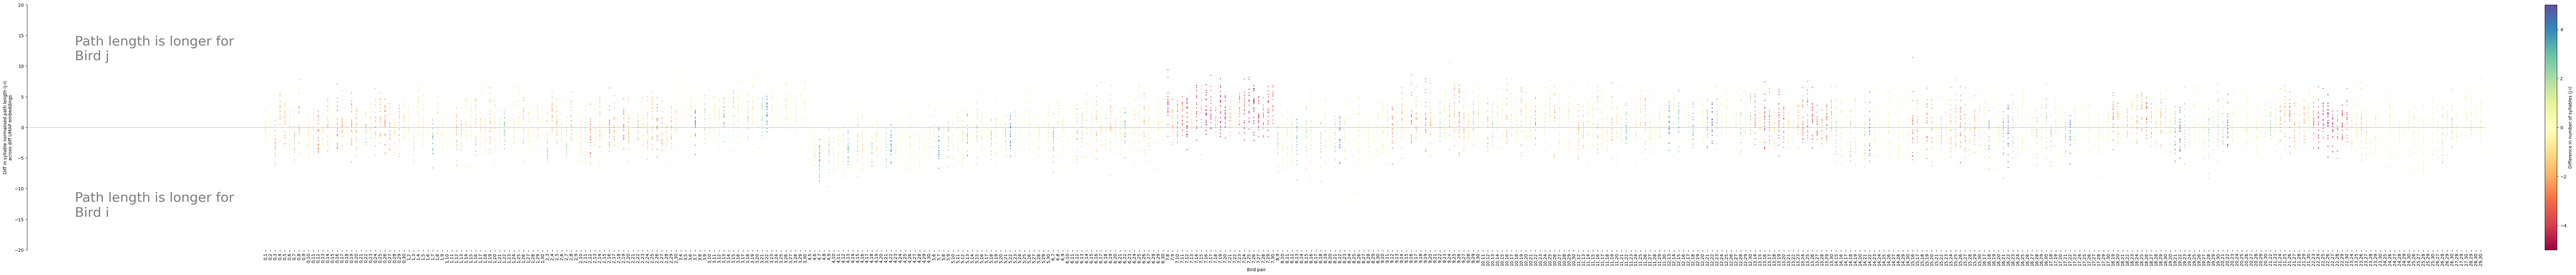

In [14]:
# Plotting the syllable count normalised difference in path lengths for each pair of birds across all UMAP renditions

fig, ax = plt.subplots(figsize=(120,10))
cp = ax.scatter(xvals, path_length_bysyll_diff_yvals, marker='.', s=5, c=nsyll_labels, alpha=1, cmap=cmap)

ax.axhline(y=0, color='grey', alpha=.5, linewidth=1)
ax.text(-40, 15, 'Path length is longer for\nBird j', color='grey', fontsize=30, va='top')
ax.text(-40, -15, 'Path length is longer for\nBird i', color='grey', fontsize=30, va='bottom')

ax.set_ylim(-20, 20)
ax.set_xlim(-50, xvals[-1]+1)

ax.set_xlabel('Bird pair')
ax.set_ylabel('Diff in syllable normalised path length (j-i)\nacross diff UMAP embeddings')

# Add a colorbar
cbar = fig.colorbar(cp, pad=0.02)
cbar.set_label('Difference in number of syllables (j-i)')

ax.set_xticks(xticks);

ax.set_xticklabels(xticklabels, rotation=90);

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)



In [15]:
# Saving the figure

fig.savefig(results_folder + 'path_length_bysyll_diff.pdf', bbox_inches='tight')
fig.savefig(results_folder + 'path_length_bysyll_diff.png', bbox_inches='tight')

Here, for each pair of birds, we plot the syllable count normalised difference in their path lengths.

If the difference is positive, it implies that bird j has the longer normalised path length and vice versa.


Additionally, the difference in syllable count is depicted by the color of the dots.


We see that for any given pair of birds, the difference in normalised path length can be either positive or negative, depending on the UMAP rendition.

Thus, there is even lesser consistency amongst different UMAP renditions in the categorisation of the birdsong with the longer path length.


We see that bird pairs with a higher occurence of normalised path length difference above or below the threshold, also have a more extreme difference in syllable count.

#### Proportion of categorisation of a bird song as the one with the "longer" path length

In [16]:
# Computing the proportion of UMAP renditions where the path length is longer for Bird j
path_length_diff_prop_yvals = ((path_length_diff_yvals>0).sum(axis=1)/20)


In [17]:
# Computing the mean proportion across all pairs of birds (not the best way to get a summary metric)
overall_prop = np.mean(path_length_diff_prop_yvals)
overall_prop

0.47290322580645155

Roughly, ~50% of the UMAP renditions categorise bird j as the one with longer path length and vice versa across all bird pairs.

In [18]:
# Computing the mean proportion across all pairs for a given bird i
prop_by_bird = np.mean(np.reshape(path_length_diff_prop_yvals, (31,465//31)), axis=1) # Per bird i, proportion of path length of bird j is longer than that of bird i
prop_by_bird;

In [19]:
prop_dict =  {
    'bird': np.arange(n_birds),
    'n_syll': distances_df.n_syll.values[::20],
    'prop': prop_by_bird
}

# Convert the dictionary to a pandas DataFrame
prop_df = pd.DataFrame(prop_dict)
# Save the DataFrame to a CSV file
prop_df.to_csv(results_folder + 'prop_by_bird.csv', index=False)

# Display the DataFrame
prop_df

,bird,n_syll,prop
0,0,6,0.260000
1,1,4,0.203333
2,2,6,0.450000
3,3,4,0.393333
4,4,6,0.183333
5,5,8,0.350000
6,6,4,0.893333
7,7,3,0.683333
8,8,4,0.333333
9,9,4,0.473333


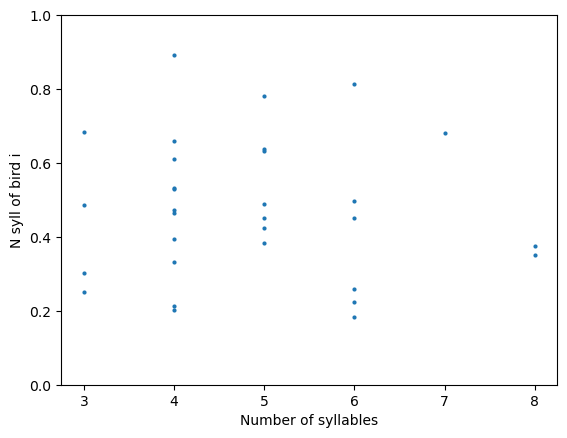

In [20]:
# Overall proportion that bird j has a longer path length than a given bird i across all pairs with bird i

plt.scatter(prop_df.n_syll, prop_df.prop, lw=0, marker='.')
plt.ylim(0,1)
plt.xlabel('Number of syllables')
plt.ylabel('N syll of bird i')

plt.savefig(results_folder + 'prop_by_nsyll.png', bbox_inches='tight')

The categorisation of the path length of birdsong i in a pair is not strongly related to the syllable count of bird i.

Further, we consider the difference in the syllable count of a pair.

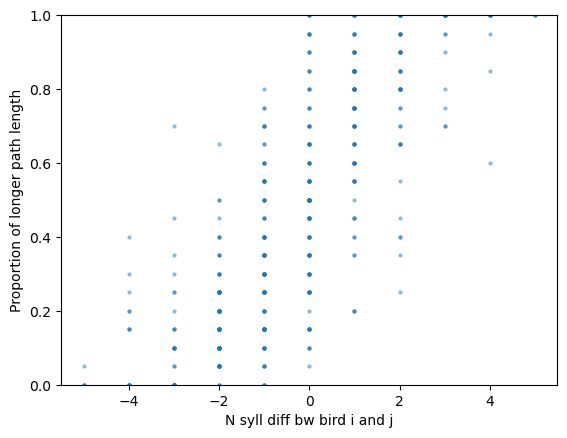

In [21]:
# Plotting the proportion of UMAP renditions where the path length is longer for Bird j against the difference in syllable count between bird i and j

plt.scatter(nsyll_labels[::20], path_length_diff_prop_yvals, lw=0, marker='.', alpha=.5)
plt.ylim(0,1)
plt.ylabel('Proportion of longer path length')
plt.xlabel('N syll diff bw bird i and j')

plt.savefig(results_folder + 'prop_by_nsylldiff.png', bbox_inches='tight')

The categorisation of the path length of birdsong j in a pair as longer may be related to the difference with the difference b/w the syllable count of two bird songs.